In [6]:
# Importando bibliotecas estatísticas e de visualização
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Grupos de dados
grupo1 = [12, 15, 18, 22, 22, 25, 28, 30, 35, 40]
grupo2 = [15, 18, 21, 25, 25, 28, 31, 33, 38, 43]

In [7]:
# Cálculo de média, variância e IQR
def resumo_estatistico(grupo):
    media = np.mean(grupo)
    variancia = np.var(grupo, ddof=1)
    iqr = stats.iqr(grupo)
    return media, variancia, iqr

media1, var1, iqr1 = resumo_estatistico(grupo1)
media2, var2, iqr2 = resumo_estatistico(grupo2)

In [8]:
print(f"Grupo 1 - Média: {media1}, Variância: {var1}, IQR: {iqr1}")
print(f"Grupo 2 - Média: {media2}, Variância: {var2}, IQR: {iqr2}")

Grupo 1 - Média: 24.7, Variância: 77.12222222222223, IQR: 10.5
Grupo 2 - Média: 27.7, Variância: 77.12222222222223, IQR: 10.5


In [9]:
# Teste de normalidade (Shapiro-Wilk)
shapiro1 = stats.shapiro(grupo1)
shapiro2 = stats.shapiro(grupo2)

In [10]:
print("\nTeste de Normalidade (Shapiro-Wilk):")
print(f"Grupo 1 - Estatística: {shapiro1.statistic}, p-valor: {shapiro1.pvalue}")
print(f"Grupo 2 - Estatística: {shapiro2.statistic}, p-valor: {shapiro2.pvalue}")


Teste de Normalidade (Shapiro-Wilk):
Grupo 1 - Estatística: 0.9793704576296214, p-valor: 0.9617099611024161
Grupo 2 - Estatística: 0.9793704576296214, p-valor: 0.9617099611024161


In [11]:
# Escolha do teste com base na normalidade
if shapiro1.pvalue > 0.05 and shapiro2.pvalue > 0.05:
    # Teste t de Student
    ttest = stats.ttest_ind(grupo1, grupo2)
    print("\nTeste t de Student:")
    print(f"Estatística t: {ttest.statistic}, p-valor: {ttest.pvalue}")
else:
    # Teste Mann-Whitney
    mw = stats.mannwhitneyu(grupo1, grupo2)
    print("\nTeste de Mann-Whitney:")
    print(f"Estatística U: {mw.statistic}, p-valor: {mw.pvalue}")



Teste t de Student:
Estatística t: -0.7638647856445084, p-valor: 0.4548448024733782


In [12]:
# Visualização: histogramas
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Distribuição - Grupo 1')

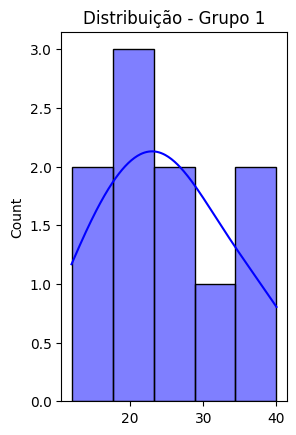

In [13]:
plt.subplot(1, 2, 1)
sns.histplot(grupo1, bins=5, kde=True, color='blue')
plt.title('Distribuição - Grupo 1')

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

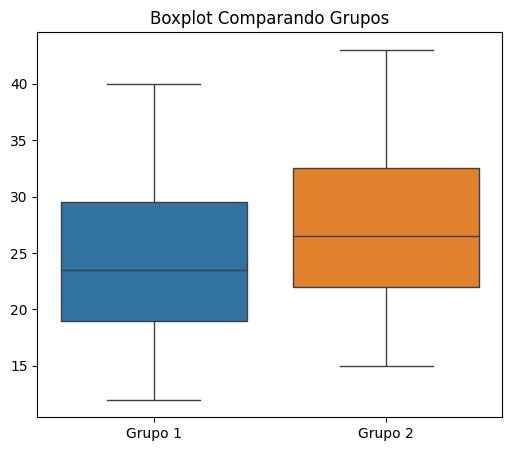

In [15]:
# Boxplot comparando os grupos
plt.figure(figsize=(6, 5))
sns.boxplot(data=[grupo1, grupo2])
plt.xticks([0, 1], ['Grupo 1', 'Grupo 2'])
plt.title('Boxplot Comparando Grupos')
plt.show()